/tmp/ipykernel_2363/1045685863.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  vol = nib.load("/takaya_workspace/Medical_AI/data/decathlon/Task09_Spleen/imagesTr/spleen_2.nii.gz").get_data()
/tmp/ipykernel_2363/1045685863.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  vol_label = nib.load("/takaya_workspace/Medical_AI/data/decathlon/Task09_Spleen/labelsTr/spleen_2.nii.gz").get_data()


(90, 512, 512)


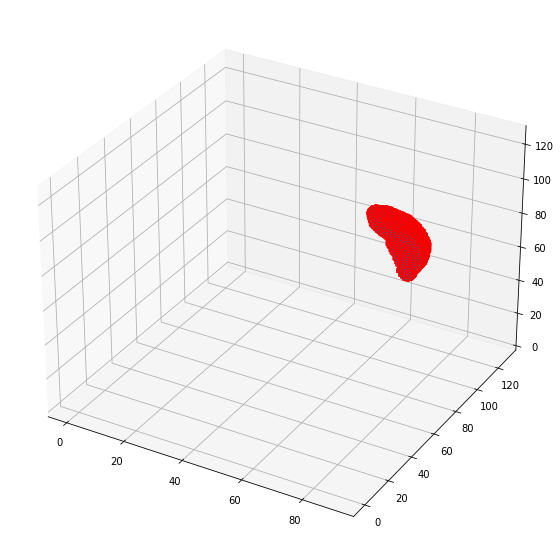

In [45]:
from PIL import Image
import matplotlib.pyplot as plt
import nibabel as nib
#from mpl_toolkits.mplot3d import Axes3D

# sampleとして用いるvolumeの読み込み
vol = nib.load("/takaya_workspace/Medical_AI/data/decathlon/Task09_Spleen/imagesTr/spleen_2.nii.gz").get_data()
vol_label = nib.load("/takaya_workspace/Medical_AI/data/decathlon/Task09_Spleen/labelsTr/spleen_2.nii.gz").get_data()

# vol_labelをmatplotlibで3Dレンダリング
vol_label = vol_label.transpose(1, 0, 2)
vol_label = vol_label[::, ::-1, ::-1]
# shapeを確認
print(vol_label.shape)
# vol_labelを90 * 128 * 128に縮小
vol_label = vol_label[::, ::4, ::4]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.voxels(vol_label, edgecolor="red")
plt.show()

In [34]:
plt.show()

In [24]:
vol_label.shape

(23, 128, 128)

In [23]:
import nibabel as nib
from PIL import Image

# imagesTrの1症例目の1枚目を読み込む
img = nib.load("/takaya_workspace/Medical_AI/data/decathlon/Task09_Spleen/imagesTr/spleen_2.nii.gz").get_data()
img = img.transpose(1, 0, 2)
print(img.shape)
img = img[::-1, ::-1, ::-1]
img = img[:, :, 13]
print(img.shape)
img = Image.fromarray(img)
img = img.convert("L")
img.save("../result/paper/spleen_label3.png")

/tmp/ipykernel_19010/86605377.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load("/takaya_workspace/Medical_AI/data/decathlon/Task09_Spleen/imagesTr/spleen_2.nii.gz").get_data()


(512, 512, 90)
(512, 512)


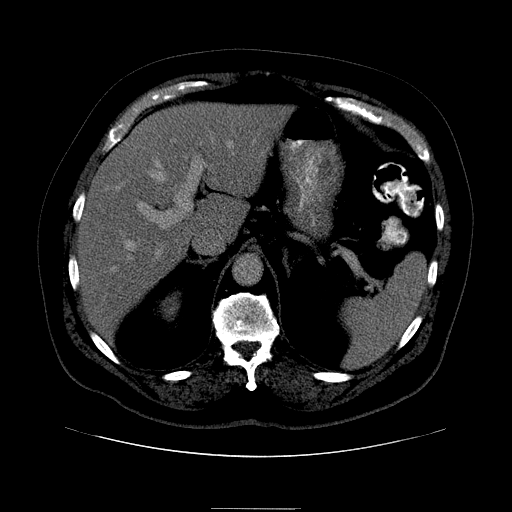

In [16]:
img

In [26]:
# labelsTrの1症例目の1枚目を読み込む
img = nib.load("/takaya_workspace/Medical_AI/data/decathlon/Task09_Spleen/labelsTr/spleen_2.nii.gz").get_data()
img = img.transpose(1, 0, 2)
print(img.shape)
img = img[::-1, ::-1, ::-1]
img = img[:, :, 15]
print(img.shape)
img = Image.fromarray(img*255)
img = img.convert("L")
img.save("../result/paper/spleen_label1.png")

(512, 512, 90)
(512, 512)


/tmp/ipykernel_19010/4260032620.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img = nib.load("/takaya_workspace/Medical_AI/data/decathlon/Task09_Spleen/labelsTr/spleen_2.nii.gz").get_data()


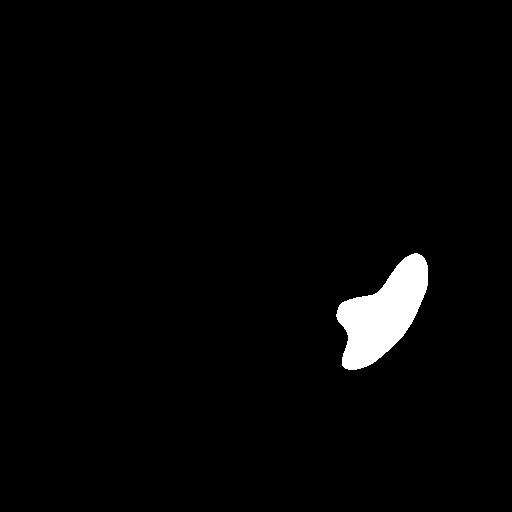

In [20]:
img

In [43]:
import pydicom
import numpy as np
import cv2
from PIL import Image, ImageDraw
def contours2list(contours):
    point_list = []
    for i in range(contours[0].shape[0]):
        point_list.append(tuple(contours[0][i][0]))
    return point_list

def window(img):
    ww = img.max() - img.min()
    wc = int(ww / 2)
    
    window_max = wc + ww / 2
    window_min = wc - ww / 2
    
    img = 255 * (img - window_min) / (window_max - window_min)
    img[img > 255] = 255
    img[img < 0] = 0
    return img

def superimpose(img_path, label_path, save_path):
    img = Image.open(img_path)
    img = img.convert("RGBA")
    mask = np.array(Image.open(label_path))
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    poly = Image.new('RGBA', img.size)
    pdraw = ImageDraw.Draw(poly)
    point_list = contours2list(contours)
    pdraw.polygon(point_list, fill=(255,0,0,200), outline=(0,0,0,255))
    img.paste(poly,mask=poly)
    img.save(save_path)

In [46]:
import numpy as np
n = 3
img_path = f"../result/paper/spleen_raw{n}.png"
label_path = f"../result/paper/spleen_label{n}.png"
save_path = f"../result/paper/spleen_impose{n}.png"

superimpose(img_path, label_path, save_path)